## Import necessary libraries

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

## Reading Excel file

In [100]:
df = pd.read_excel("aspiring_minds_employability_outcomes_2015.xlsx")

In [101]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [102]:
df["Unnamed: 0"].unique()

array(['train'], dtype=object)

In [103]:
df.shape

(3998, 39)

## Information about data frames

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

## Display all the columns

In [105]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

## Checking for null values

In [106]:
df.isnull().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

## Observation:
* There is no null values

In [107]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics)
len(numeric_df.columns)

27

## Statistical Analysis of the Dataset

In [108]:
df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


## Drop some unneccessary columns to keep our dataset clean

In [109]:
df.drop(['ID','10board','12board','CollegeID','CollegeCityID'],axis=1,inplace=True)
df.head()

,Unnamed: 0,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,2007,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,2007,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,2010,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,2007,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,2008,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [110]:
df.shape

(3998, 34)

## Exploratory Data Analysis and Visualization

In [111]:
df.columns

Index(['Unnamed: 0', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '12graduation', '12percentage',
       'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityTier', 'CollegeState', 'GraduationYear', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

## Univariate Analysis

## PDF distribution of Salary

Skewness:6.45
Kurtosis:80.93


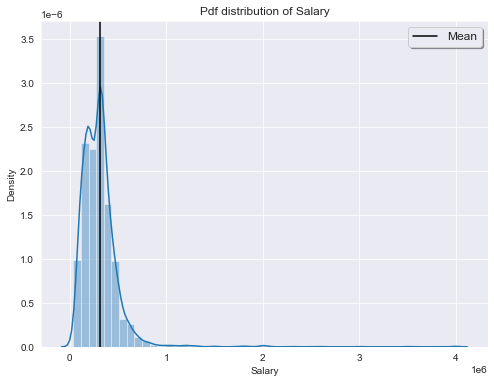

In [112]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,6))
sns.distplot(df['Salary'])
plt.axvline(df['Salary'].mean(),color='black', label='Mean')
plt.title("Pdf distribution of Salary")
plt.legend(shadow=True,fontsize="larger")

skew = df['Salary'].skew()
kurt = df['Salary'].kurt()
print('Skewness:{}'.format(round(skew,2)))
print('Kurtosis:{}'.format(round(kurt,2)))

## Observation:
* From the above plot as we can see that it's having a long tail at the right side , looks like log normal distribution

## PDF distribution of 10percentage

Skewness:-0.59
Kurtosis:-0.11


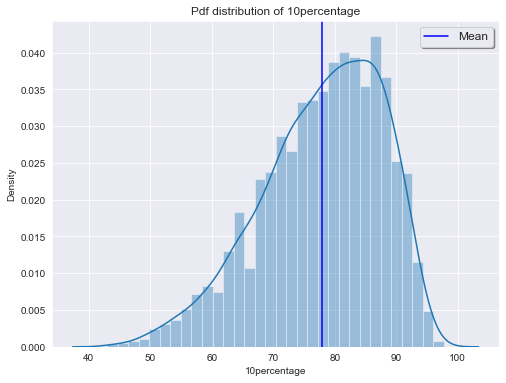

In [113]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,6))
sns.distplot(df['10percentage'])
plt.axvline(df['10percentage'].mean(), color="blue", label="Mean")
plt.title("Pdf distribution of 10percentage")
plt.legend(shadow=True,fontsize="larger")

skew = df['10percentage'].skew()
kurt = df['10percentage'].kurt()
print('Skewness:{}'.format(round(skew,2)))
print('Kurtosis:{}'.format(round(kurt,2)))

## Observation:
* From the above plot as we can see that it's having a thick tail towards the left side looks like a negatively skewed distribution

## PDF distribution of 12percentage

Skewness:-0.03
Kurtosis:-0.63


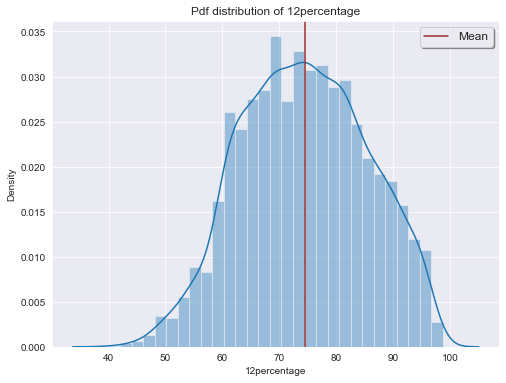

In [114]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,6))
sns.distplot(df['12percentage'])
plt.axvline(df['12percentage'].mean(), color="brown", label="Mean")
plt.title("Pdf distribution of 12percentage")
plt.legend(shadow=True,fontsize="larger")

skew = df['12percentage'].skew()
kurt = df['12percentage'].kurt()
print('Skewness:{}'.format(round(skew,2)))
print('Kurtosis:{}'.format(round(kurt,2)))

## Observation:
* From the above plot as we can see that it's having a tail towards left side looks like a negatively skewed distribution

## PDF distribution of collegeGPA

Skewness:-1.25
Kurtosis:10.23


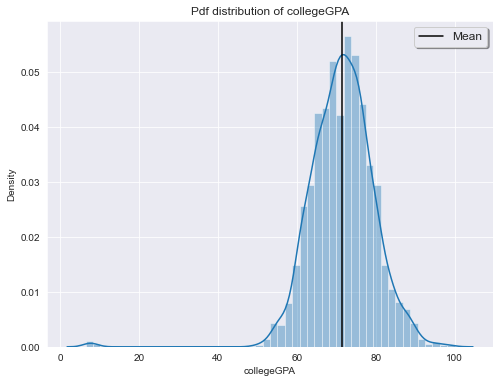

In [115]:
sns.set_style("darkgrid")
plt.figure(figsize=(8,6))
sns.distplot(df['collegeGPA'])
plt.axvline(df['collegeGPA'].mean(), color="black", label="Mean")
plt.title("Pdf distribution of collegeGPA")
plt.legend(shadow=True,fontsize="larger")

skew = df['collegeGPA'].skew()
kurt = df['collegeGPA'].kurt()
print('Skewness:{}'.format(round(skew,2)))
print('Kurtosis:{}'.format(round(kurt,2)))

## Observation:
* From the above plot we can see that it's having a long tail towards the left looks like highly negativly skewed

## Plotting Gender Wise Distribution

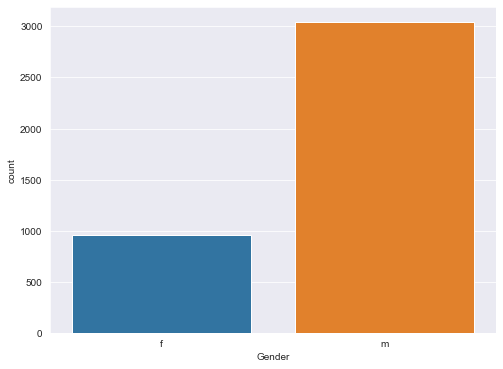

In [116]:
plt.figure(figsize=(8,6))
sns.countplot(df['Gender'])
plt.show()

## Observation:
* From the above plot we can say that there are more male candidates than female

## Designation oﬀered in the job and it's count

In [117]:
df['Designation']

0           senior quality engineer
1                 assistant manager
2                  systems engineer
3          senior software engineer
4                               get
                   ...             
3993              software engineer
3994               technical writer
3995    associate software engineer
3996             software developer
3997        senior systems engineer
Name: Designation, Length: 3998, dtype: object

In [118]:
designations = df['Designation'].unique()
len(designations) 

419

## Observation:
* There are 419 unique values

In [119]:
designation_count = df['Designation'].value_counts()
designation_count

software engineer               539
software developer              265
system engineer                 205
programmer analyst              139
systems engineer                118
                               ... 
software devloper                 1
software analyst                  1
telecom support engineer          1
system engineer trainee           1
electrical controls engineer      1
Name: Designation, Length: 419, dtype: int64

In [120]:
# Taking the most frequent designation
designation_count[:15]

software engineer             539
software developer            265
system engineer               205
programmer analyst            139
systems engineer              118
java software engineer        111
software test engineer        100
project engineer               77
technical support engineer     76
senior software engineer       72
java developer                 67
test engineer                  57
web developer                  54
application developer          52
assistant manager              52
Name: Designation, dtype: int64

Text(0.5, 1.0, 'Job Designation of a CSE Fresher')

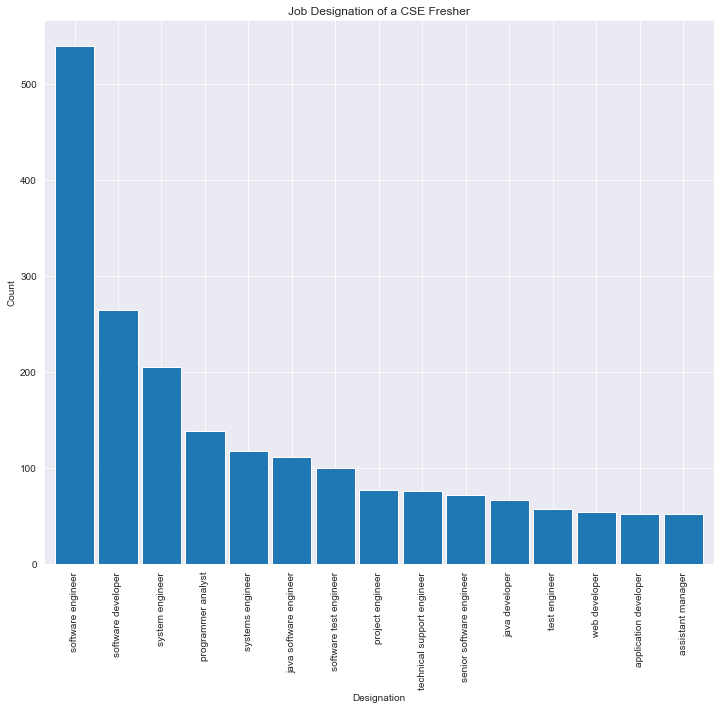

In [121]:
#Plotting the most frequent designation
sns.set_style("darkgrid")
plt.figure(figsize=(12,10))
designation_count[:15].plot(kind='bar' , width=0.9)
plt.xlabel('Designation')
plt.ylabel('Count')
plt.title('Job Designation of a CSE Fresher')

## Observation:
* From the above plot we can analyse that most of the candidate choose software engineering

## Location of the job (city) and it's count

In [122]:
df['JobCity']

0              Bangalore
1                 Indore
2                Chennai
3                Gurgaon
4                Manesar
              ...       
3993          New Delhi 
3994           Hyderabad
3995           Bangalore
3996    Asifabadbanglore
3997             Chennai
Name: JobCity, Length: 3998, dtype: object

In [123]:
jobcities = df['JobCity'].unique()
len(jobcities)

339

## Observation:
* There are 339 unique values

In [124]:
jobcities_count = df['JobCity'].value_counts()
jobcities_count

Bangalore    627
-1           461
Noida        368
Hyderabad    335
Pune         290
            ... 
Hospete        1
Mainpuri       1
Dharuhera      1
kala amb       1
pondy          1
Name: JobCity, Length: 339, dtype: int64

## Observation:
* As you can see above there is an wrong data "-1", we simply gonna replace it with na value and drop it

In [125]:
df['JobCity'].replace(-1,np.nan,inplace=True)
df['JobCity'].dropna(inplace=True)

In [126]:
jobcities_count = df['JobCity'].value_counts()
jobcities_count

Bangalore    627
Noida        368
Hyderabad    335
Pune         290
Chennai      272
            ... 
Hospete        1
Mainpuri       1
Dharuhera      1
kala amb       1
pondy          1
Name: JobCity, Length: 338, dtype: int64

In [127]:
# Taking the most frequent cities that a candidate choose to work
jobcities_count[:10]

Bangalore    627
Noida        368
Hyderabad    335
Pune         290
Chennai      272
Gurgaon      198
New Delhi    196
Mumbai       108
Kolkata       98
Jaipur        46
Name: JobCity, dtype: int64

Text(0.5, 1.0, 'Preferred Cities')

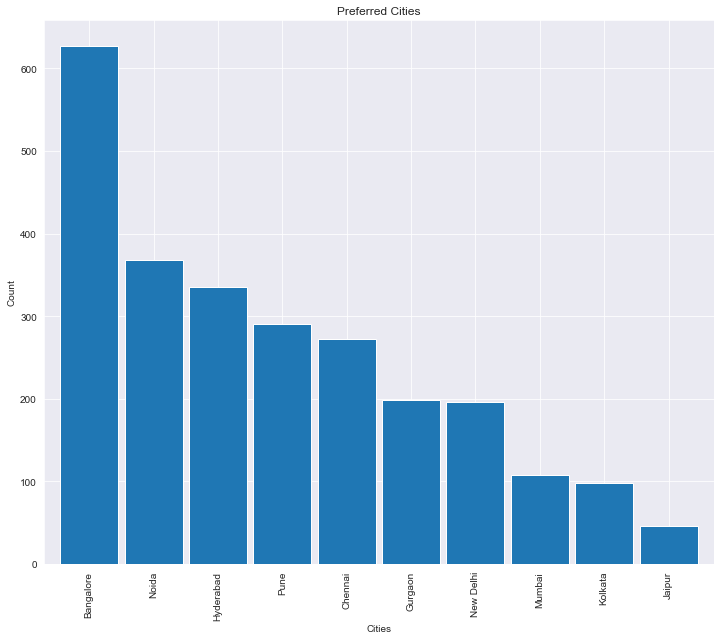

In [128]:
#Plotting the most frequent cities
sns.set_style("darkgrid")
plt.figure(figsize=(12,10))
jobcities_count[:10].plot(kind='bar' , width=0.9)
plt.xlabel('Cities')
plt.ylabel('Count')
plt.title('Preferred Cities')

## Observation:
* From the above plot we can say that most of the candidates choose Bangalore As their preferred city

## Degree obtained/pursued by the candidate and it's count

In [129]:
df['Degree']

0       B.Tech/B.E.
1       B.Tech/B.E.
2       B.Tech/B.E.
3       B.Tech/B.E.
4       B.Tech/B.E.
           ...     
3993    B.Tech/B.E.
3994    B.Tech/B.E.
3995    B.Tech/B.E.
3996    B.Tech/B.E.
3997    B.Tech/B.E.
Name: Degree, Length: 3998, dtype: object

In [130]:
uniq_degree = df['Degree'].unique()
len(uniq_degree)

4

## Observation:
* There are 4 unique values

In [131]:
degree_count = df['Degree'].value_counts()
degree_count

B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: Degree, dtype: int64

Text(0.5, 1.0, 'Degree obtained/pursued by the candidate')

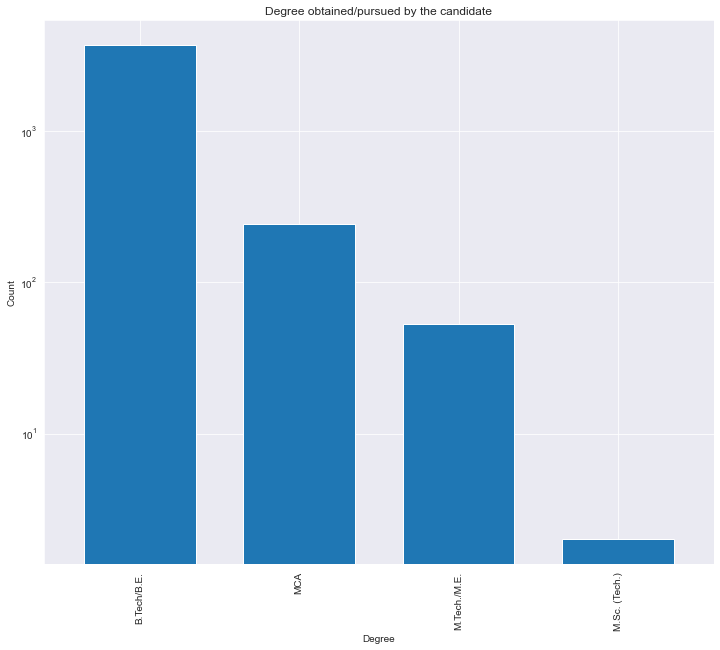

In [132]:
# Plotting the most frequent Degree
sns.set_style("darkgrid")
plt.figure(figsize=(12,10))
degree_count.plot(kind='bar' , width=0.7 , logy=True)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree obtained/pursued by the candidate')

## Observation:
* From the above plot we can say that most of the candidates are from B.Tech/B.E

## Specialization pursued by the candidate and it's count

In [133]:
df['Specialization']

0                            computer engineering
1       electronics and communication engineering
2                          information technology
3                            computer engineering
4       electronics and communication engineering
                          ...                    
3993                       information technology
3994    electronics and communication engineering
3995                         computer engineering
3996               computer science & engineering
3997                       information technology
Name: Specialization, Length: 3998, dtype: object

In [134]:
uniq_specialization = df['Specialization'].unique()
len(uniq_specialization)

46

## Observation:
* There are 46 unique values

In [135]:
specialization_count = df['Specialization'].value_counts()
specialization_count

electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
electronics and instrumentation engineering     27
information science engineering                 27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
chemical engineering                             9
applied electronics and instrum

In [136]:
specialization_count[:10]

electronics and communication engineering    880
computer science & engineering               744
information technology                       660
computer engineering                         600
computer application                         244
mechanical engineering                       201
electronics and electrical engineering       196
electronics & telecommunications             121
electrical engineering                        82
electronics & instrumentation eng             32
Name: Specialization, dtype: int64

Text(0.5, 1.0, 'Specialization pursued by the candidate')

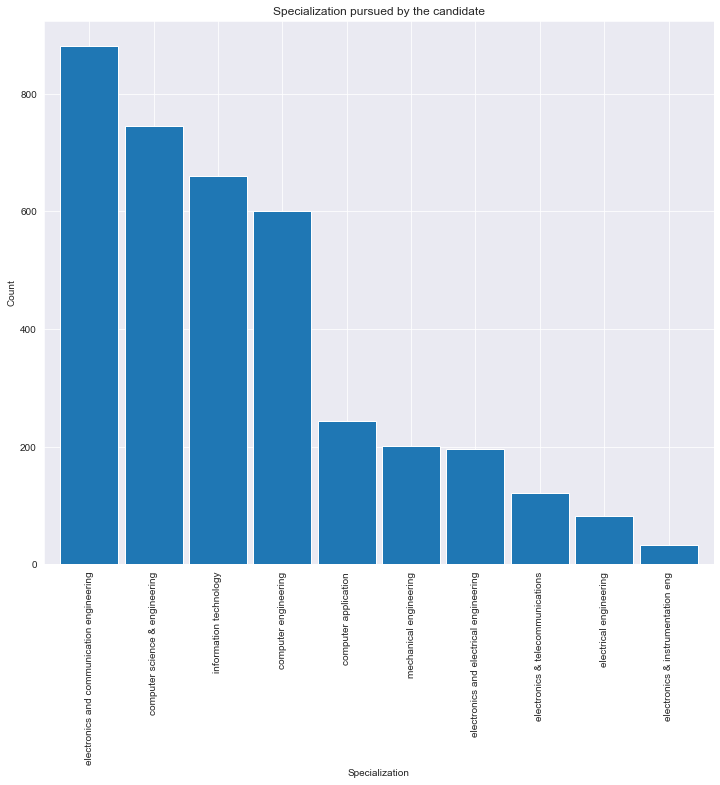

In [137]:
#Plotting the most frequent specialization
sns.set_style("darkgrid")
plt.figure(figsize=(12,10))
specialization_count[:10].plot(kind='bar' , width=0.9)
plt.xlabel('Specialization')
plt.ylabel('Count')
plt.title('Specialization pursued by the candidate')

## Observation:
* From the above plot we can see that most choosed specialization is Electronics and communication engineering

## College State and it's count

In [138]:
df['CollegeState']

0       Andhra Pradesh
1       Madhya Pradesh
2        Uttar Pradesh
3                Delhi
4        Uttar Pradesh
             ...      
3993           Haryana
3994         Telangana
3995            Orissa
3996         Karnataka
3997        Tamil Nadu
Name: CollegeState, Length: 3998, dtype: object

In [139]:
uniq_collegestate = df['CollegeState'].unique()
len(uniq_collegestate)

26

In [140]:
college_state_count = df['CollegeState'].value_counts()
college_state_count

Uttar Pradesh        915
Karnataka            370
Tamil Nadu           367
Telangana            319
Maharashtra          262
Andhra Pradesh       225
West Bengal          196
Punjab               193
Madhya Pradesh       189
Haryana              180
Rajasthan            174
Orissa               172
Delhi                162
Uttarakhand          113
Kerala                33
Jharkhand             28
Chhattisgarh          27
Gujarat               24
Himachal Pradesh      16
Bihar                 10
Jammu and Kashmir      7
Union Territory        5
Assam                  5
Sikkim                 3
Meghalaya              2
Goa                    1
Name: CollegeState, dtype: int64

Text(0.5, 1.0, 'College State Distribution')

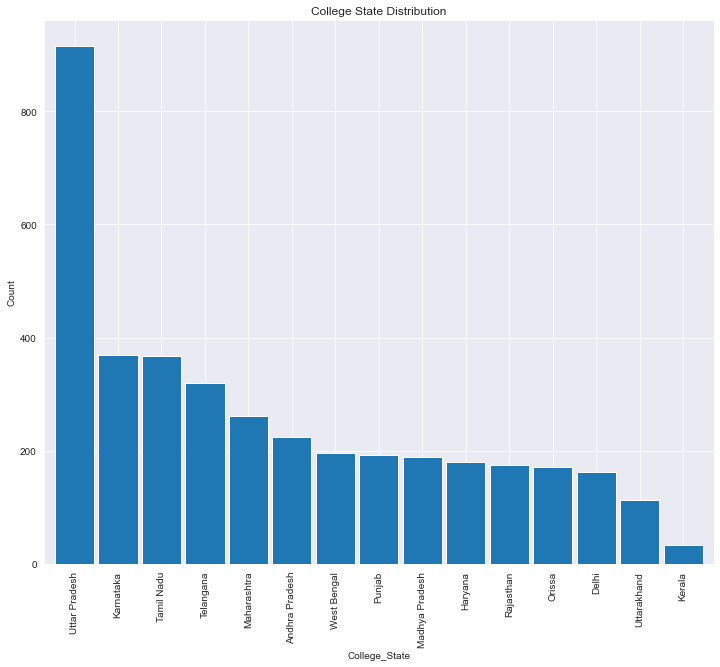

In [141]:
sns.set_style("darkgrid")
plt.figure(figsize=(12,10))
college_state_count[:15].plot(kind='bar' , width=0.9)
plt.xlabel('College_State')
plt.ylabel('Count')
plt.title('College State Distribution')

## Observation:
* From the above plot we can see that Uttar Pradesh is having most of the preferrence colleges

## Yearwise Employment groupby Gender

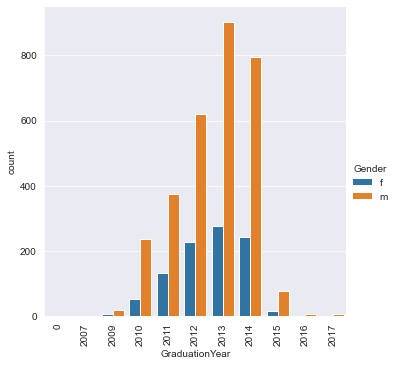

In [142]:
sns.catplot(x = "GraduationYear",hue="Gender",data = df,kind='count')
plt.xticks(rotation=90)
plt.show()

## Observation:
* From the above plot we can say that in 2013 joining of employee is higher , in 2017 joining of employee is lower and in all the years joining of male emplyoee is higher then female employees

## Detect the outliers in each numerical column

In [143]:
df.columns

Index(['Unnamed: 0', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '12graduation', '12percentage',
       'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityTier', 'CollegeState', 'GraduationYear', 'English',
       'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

## Finding the outliers in 10percentage column


<AxesSubplot:xlabel='10percentage'>

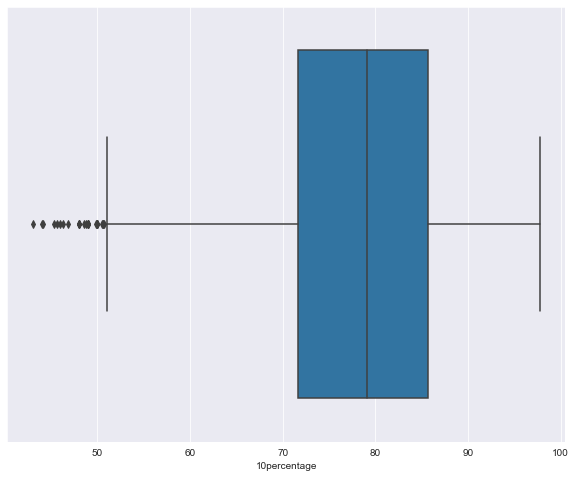

In [202]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['10percentage'])

In [201]:
# Outliers
df['10percentage'][df['10percentage']<52].reset_index()

,index,10percentage
0,108,51.00
1,245,50.60
2,466,44.16
3,490,44.00
4,491,45.60
5,502,48.00
6,600,49.00
7,613,48.00
8,887,51.20
9,898,49.00


## Finding the outliers in 12percentage column

<AxesSubplot:xlabel='12percentage'>

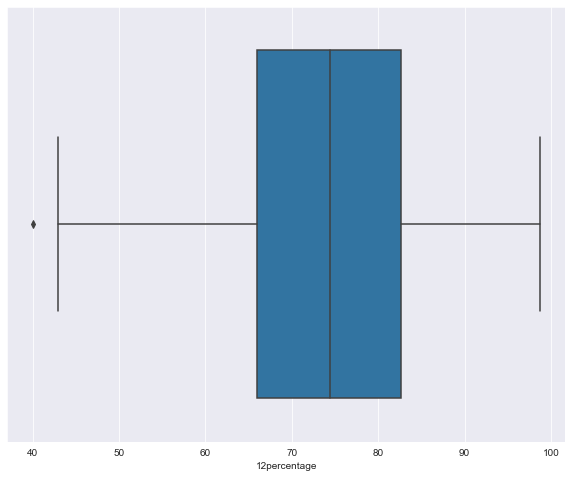

In [197]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['12percentage'])

In [198]:
# outliers
df['10percentage'][df['10percentage']<44].reset_index()

,index,10percentage
0,1334,43.0


<AxesSubplot:xlabel='12percentage'>

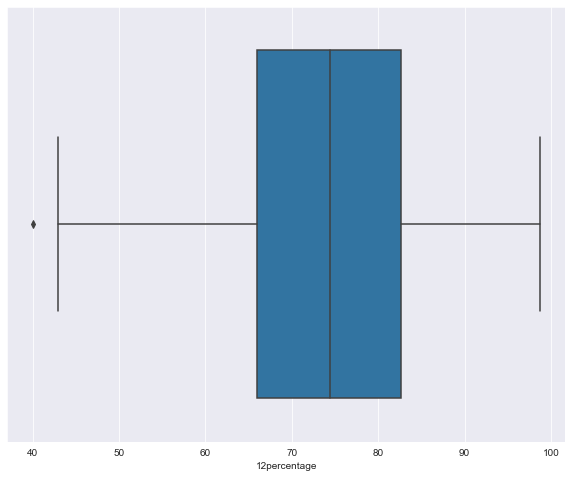

In [199]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['12percentage'])

## Finding the outliers in Salary column

<AxesSubplot:xlabel='Salary'>

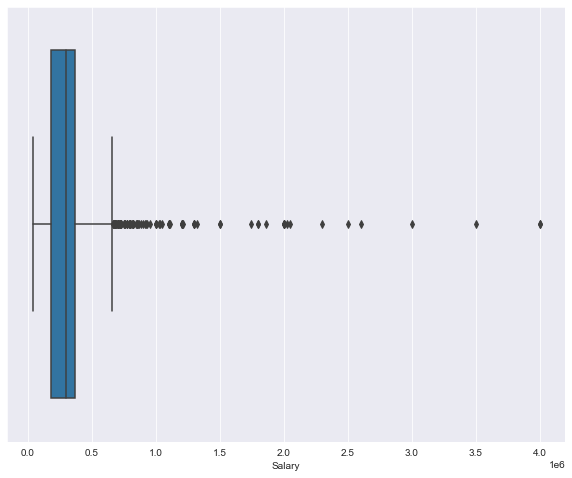

In [148]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['Salary'])

## Observation:
* From the above plot we can say that there are some outliers

## Finding the outliers in collegeGPA column

<AxesSubplot:xlabel='collegeGPA'>

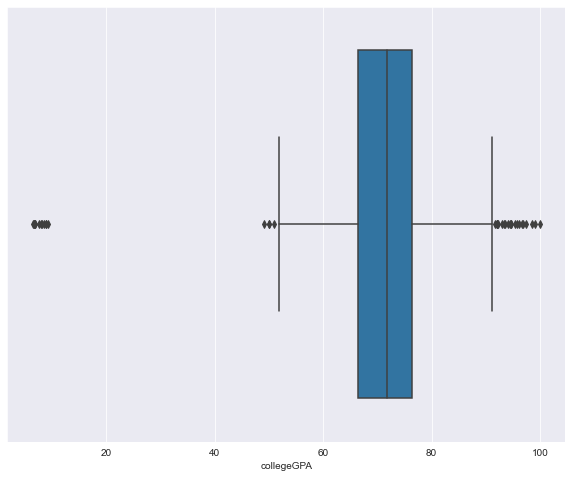

In [149]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['collegeGPA'])

In [150]:
# Outliers
df['collegeGPA'][(df['collegeGPA']<53) | (df['collegeGPA']>93)].reset_index()

,index,collegeGPA
0,7,8.58
1,138,6.63
2,324,52.00
3,614,93.60
4,690,99.93
5,788,6.80
6,874,94.50
7,907,50.00
8,968,52.00
9,1134,96.00


## Finding the outliers in English column

<AxesSubplot:xlabel='English'>

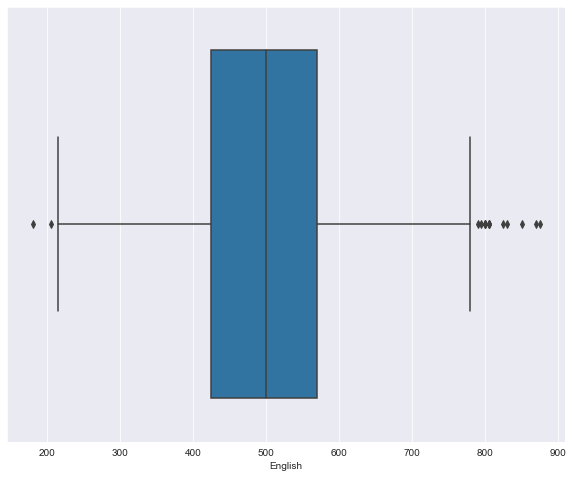

In [151]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['English'])

In [152]:
# Outliers
df['English'][(df['English']<220) | (df['English']>790)].reset_index()

,index,English
0,275,875
1,444,825
2,624,215
3,668,870
4,847,800
5,935,205
6,1183,805
7,1217,180
8,1450,830
9,1519,795


## Finding the outliers in Logical column

<AxesSubplot:xlabel='Logical'>

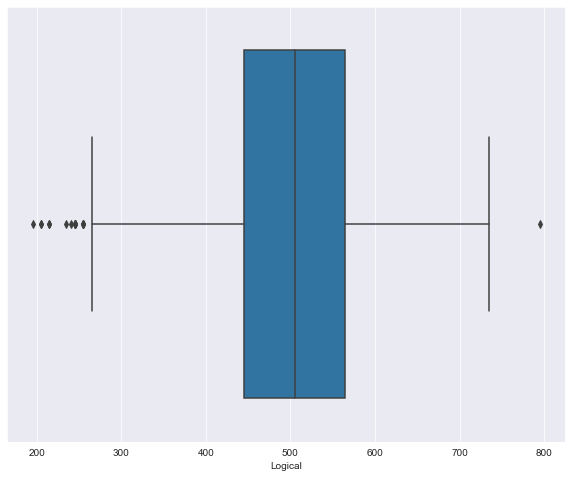

In [153]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['Logical'])


In [154]:
# Outliers
df['Logical'][(df['Logical']<260) | (df['Logical']>790)].reset_index()

,index,Logical
0,101,255
1,133,205
2,207,245
3,345,215
4,628,215
5,1014,795
6,1160,255
7,1439,245
8,2141,255
9,2265,255


## Finding the outliers in Quant column

<AxesSubplot:xlabel='Quant'>

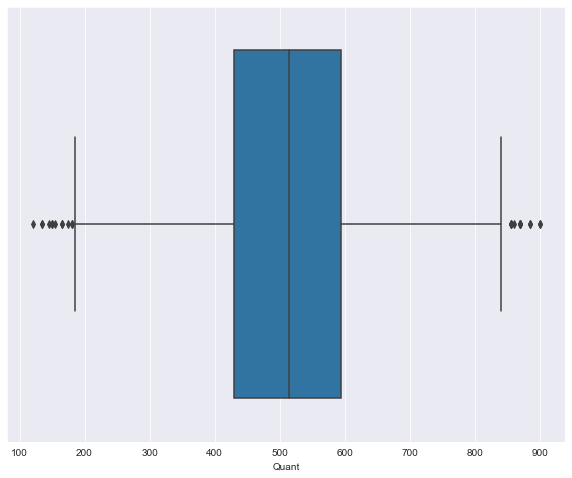

In [155]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['Quant'])

In [156]:
# Outliers
df['Quant'][(df['Quant']<190) | (df['Quant']>850)].reset_index()

,index,Quant
0,195,870
1,522,165
2,564,180
3,698,860
4,783,180
5,899,870
6,1148,175
7,1310,870
8,1661,870
9,1815,135


## Finding the outliers in Domain column


<AxesSubplot:xlabel='Domain'>

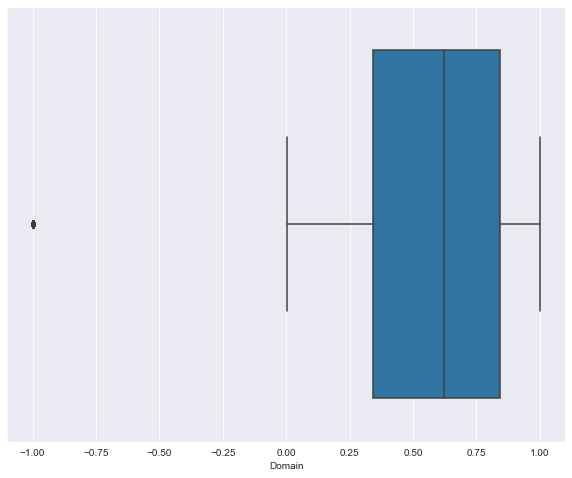

In [157]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['Domain'])

In [158]:
# Outliers
df['Domain'][df['Domain'] <= -1].value_counts().reset_index()

,index,Domain
0,-1.0,246


## Finding the outliers in ComputerProgramming column

<AxesSubplot:xlabel='ComputerProgramming'>

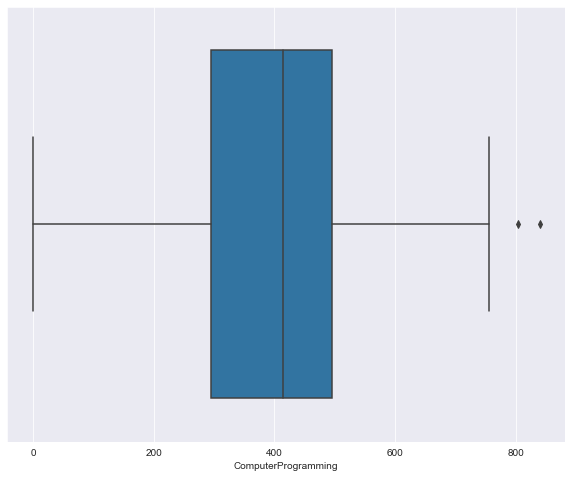

In [159]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['ComputerProgramming'])

In [160]:
# Outliers
df['ComputerProgramming'][df['ComputerProgramming'] > 800].reset_index()

,index,ComputerProgramming
0,64,804
1,1711,840


## Finding the outliers in ElectronicsAndSemicon column

<AxesSubplot:xlabel='ElectronicsAndSemicon'>

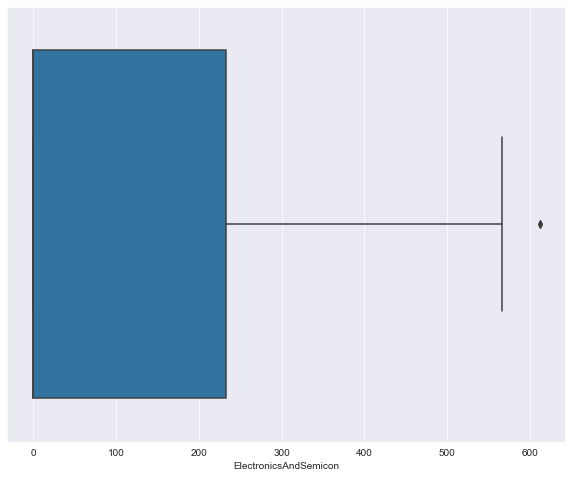

In [161]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['ElectronicsAndSemicon'])

In [162]:
# Outliers
df['ElectronicsAndSemicon'][df['ElectronicsAndSemicon'] > 600].reset_index()

,index,ElectronicsAndSemicon
0,1557,612
1,3889,612


## Frequency distribution of ComputerScience column

<AxesSubplot:xlabel='ComputerScience'>

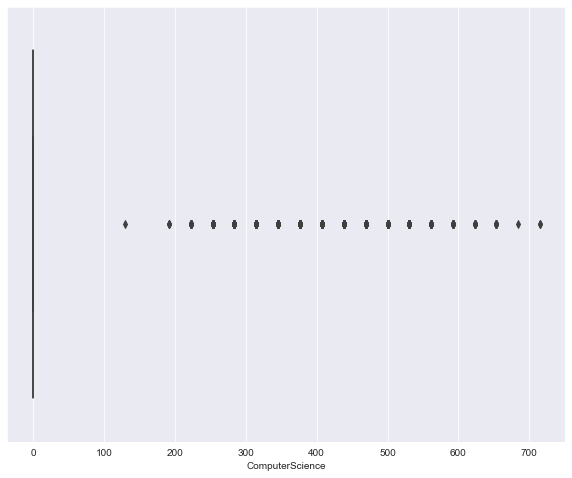

In [163]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['ComputerScience'])

In [164]:
df['ComputerScience'][df['ComputerScience'] > 100].value_counts().reset_index()

,index,ComputerScience
0,407,128
1,376,123
2,346,118
3,438,111
4,469,80
5,315,77
6,500,64
7,284,50
8,530,45
9,253,30


## Frequency distribution of MechanicalEngg column

<AxesSubplot:xlabel='MechanicalEngg'>

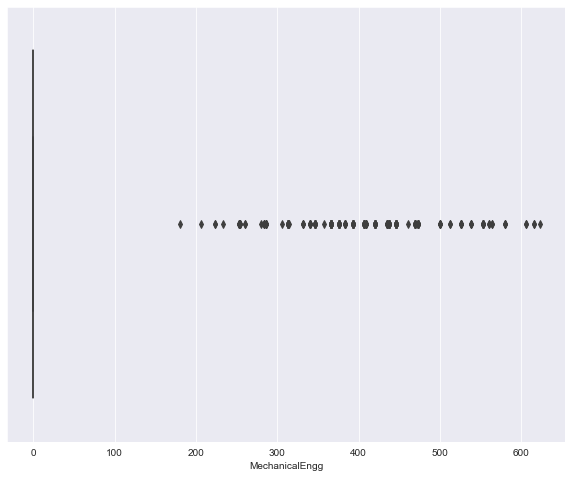

In [165]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['MechanicalEngg'])

In [166]:
df['MechanicalEngg'][df['MechanicalEngg'] > 170].value_counts().reset_index()

,index,MechanicalEngg
0,366,20
1,446,16
2,438,15
3,420,14
4,313,13
5,393,13
6,376,13
7,407,12
8,346,11
9,473,10


## Frequency Distribution of ElectricalEngg column

<AxesSubplot:xlabel='ElectricalEngg'>

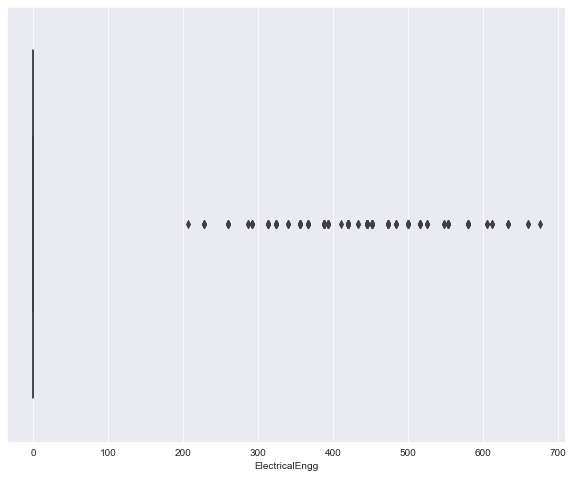

In [167]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['ElectricalEngg'])

In [168]:
df['ElectricalEngg'][df['ElectricalEngg'] > 200].value_counts().reset_index()

,index,ElectricalEngg
0,420,16
1,446,14
2,388,10
3,473,10
4,452,10
5,356,9
6,500,8
7,580,8
8,393,7
9,324,7


## Frequency Distribution of TelecomEngg column

<AxesSubplot:xlabel='TelecomEngg'>

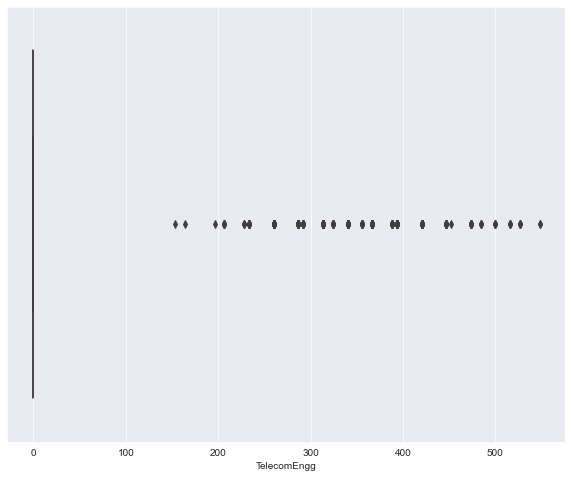

In [169]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(df['TelecomEngg'])

In [170]:
df['TelecomEngg'][df['TelecomEngg'] > 150].value_counts().reset_index()

,index,TelecomEngg
0,393,45
1,366,43
2,260,35
3,313,34
4,340,32
5,286,31
6,420,26
7,446,16
8,388,14
9,233,14


## Bivariate Analysis

## Correlation between the features using corr() function

In [171]:
df.corr()

,Salary,10percentage,12graduation,12percentage,CollegeTier,collegeGPA,CollegeCityTier,GraduationYear,English,Logical,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
Salary,1.000000,0.177373,-0.161383,0.170254,-0.179332,0.130103,0.015384,-0.010053,0.178219,0.179275,...,-0.100720,0.018475,-0.047598,-0.022691,0.037639,-0.064148,0.057423,-0.010213,-0.054685,-0.011312
10percentage,0.177373,1.000000,0.269957,0.643378,-0.126042,0.312538,0.116707,-0.013799,0.350780,0.316014,...,-0.018933,0.050364,0.074419,0.049378,0.030002,0.067657,0.136645,-0.004679,-0.132496,0.036692
12graduation,-0.161383,0.269957,1.000000,0.259166,0.027691,0.086001,-0.003016,0.014457,0.147925,0.105887,...,0.293439,0.035459,0.123751,0.023470,-0.004727,0.103329,0.041182,0.061956,-0.074369,-0.015069
12percentage,0.170254,0.643378,0.259166,1.000000,-0.100771,0.346137,0.130462,-0.012933,0.212888,0.243571,...,-0.043534,0.037635,0.064001,0.044201,0.005910,0.058299,0.103998,-0.007486,-0.094369,0.006332
CollegeTier,-0.179332,-0.126042,0.027691,-0.100771,1.000000,-0.086781,-0.101494,-0.005557,-0.183843,-0.182811,...,0.001053,-0.021548,0.002594,0.000007,-0.033722,0.055174,-0.038055,0.009970,0.023778,-0.019179
collegeGPA,0.130103,0.312538,0.086001,0.346137,-0.086781,1.000000,0.017471,0.008706,0.106478,0.196610,...,0.007601,-0.031765,0.052258,-0.005226,-0.018950,0.069582,0.068282,-0.032684,-0.074859,0.028071
CollegeCityTier,0.015384,0.116707,-0.003016,0.130462,-0.101494,0.017471,1.000000,0.008152,0.050462,0.020353,...,-0.010643,-0.052395,0.010311,0.049876,-0.033392,0.014763,0.005565,-0.008203,0.004442,-0.016790
GraduationYear,-0.010053,-0.013799,0.014457,-0.012933,-0.005557,0.008706,0.008152,1.000000,-0.024089,-0.024018,...,0.024089,-0.066844,0.008525,0.004226,0.001696,-0.013235,-0.002877,0.008397,-0.000417,0.016855
English,0.178219,0.350780,0.147925,0.212888,-0.183843,0.106478,0.050462,-0.024089,1.000000,0.444357,...,0.059500,-0.002477,0.032438,-0.005822,-0.007724,0.034943,0.194990,0.018755,-0.155528,0.067979
Logical,0.179275,0.316014,0.105887,0.243571,-0.182811,0.196610,0.020353,-0.024018,0.444357,1.000000,...,0.044481,-0.009861,0.012003,-0.012947,-0.011286,0.025876,0.167207,-0.006949,-0.178781,0.048420


## Observation:
* As we can see above the most of the data points are between -1 to +1 where -1 means negatively correlated and +1 means highly positive relation

## Correlation between the features using Heatmap

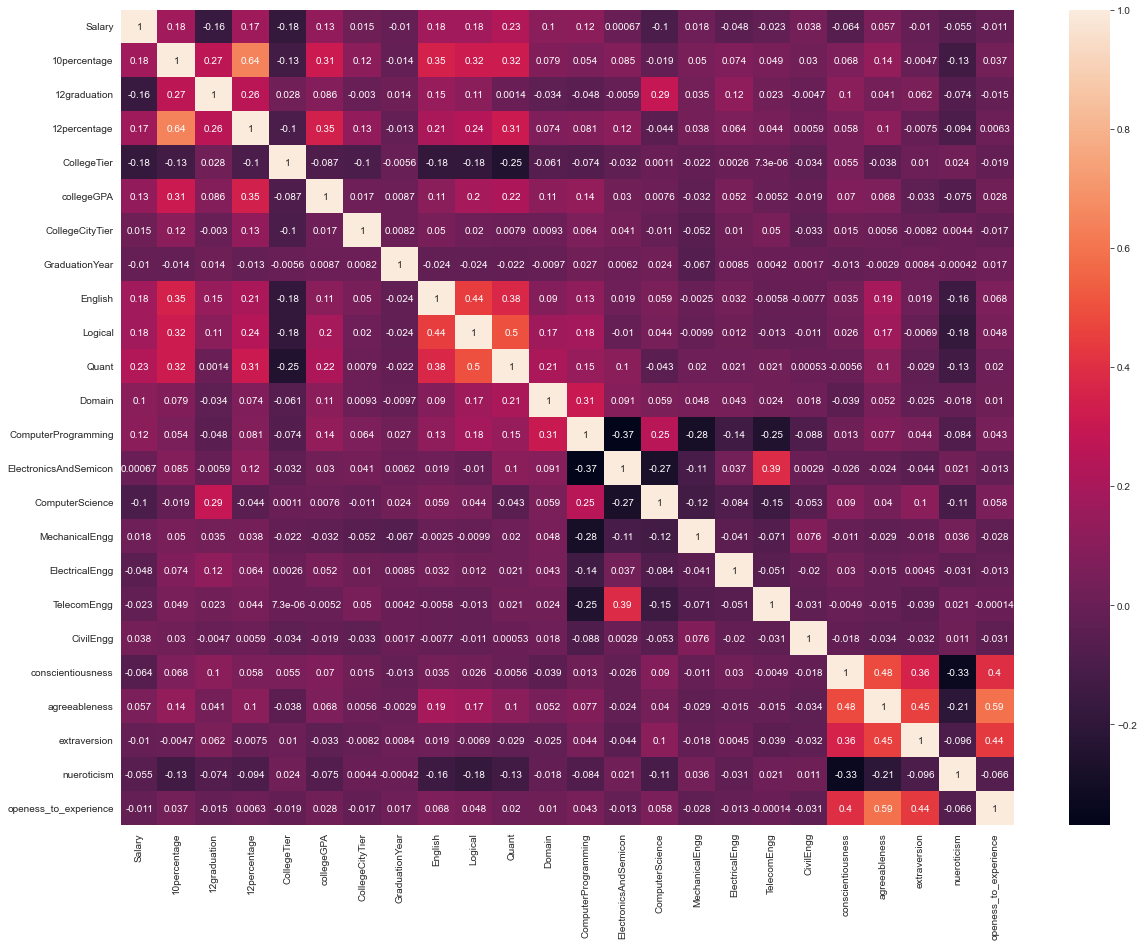

In [172]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr() , annot=True)
plt.show()

## Observation:
* From the above plot we can say that 10percentage and 12percentage is highly positively correlated with each other means if a student got a better marks in 10th standard then it is highly possible that he or she can get the better marks in 12th standard also
* We can also say that the subjects English,Logical,Quant are also positively correlated with each other means if a student get better marks in one subject then it is highly possible that he or she will get better marks in other subjects also
* As we can see that Conscientiousness, Agreeableness, Extraversion, and Openess_to_experience are also highly correlated with each other

## Correlation between the features using pairplot

<Figure size 1440x1080 with 0 Axes>

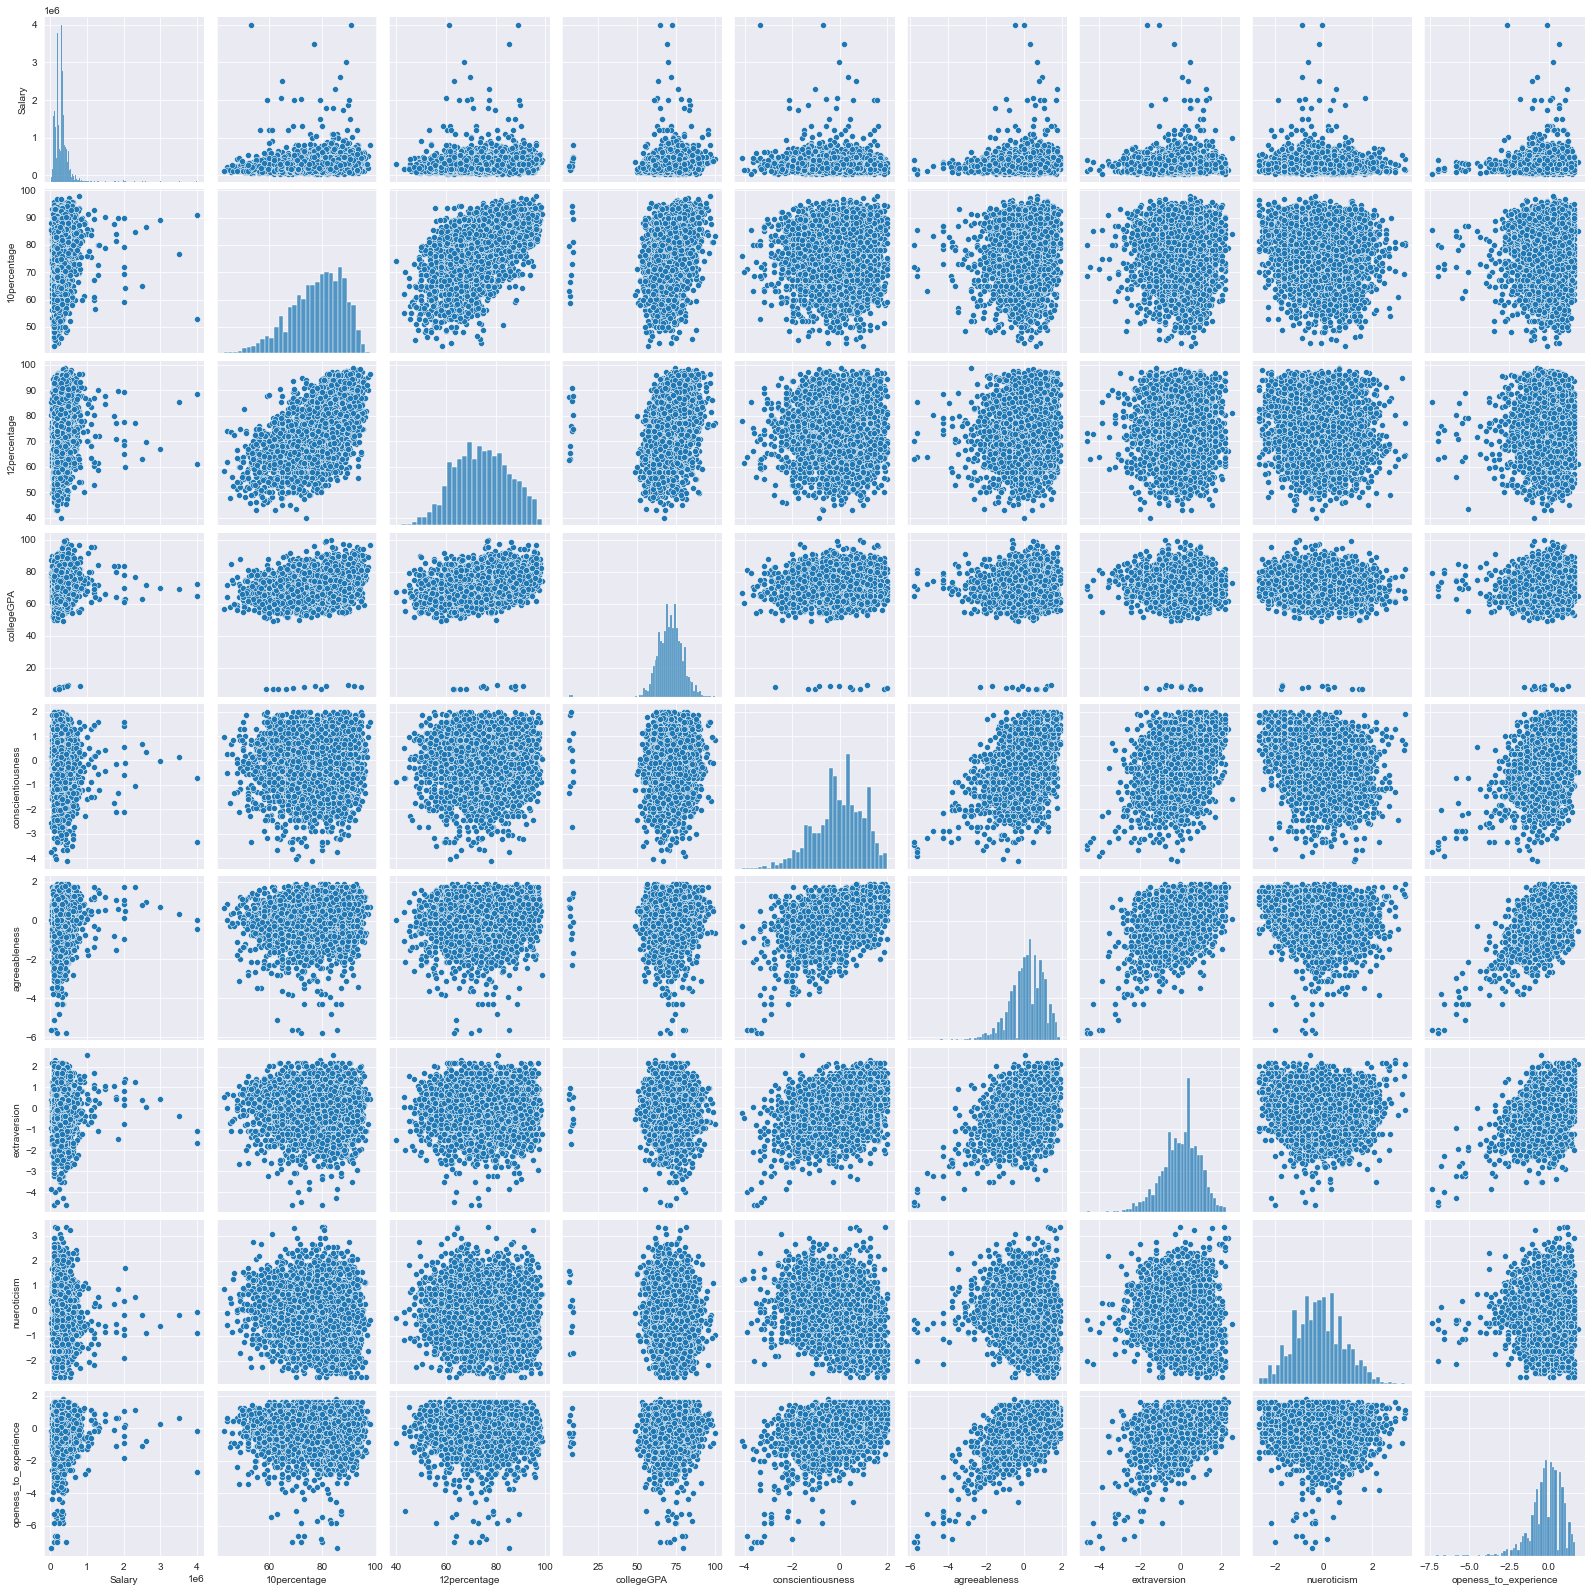

In [173]:
plt.figure(figsize=(20,15))
data = df[['Salary','10percentage','12percentage','collegeGPA', 'conscientiousness','agreeableness','extraversion','nueroticism','openess_to_experience']]
sns.pairplot(data)
plt.show()

## Correlation between the features using scatterplot

<AxesSubplot:xlabel='10percentage', ylabel='12percentage'>

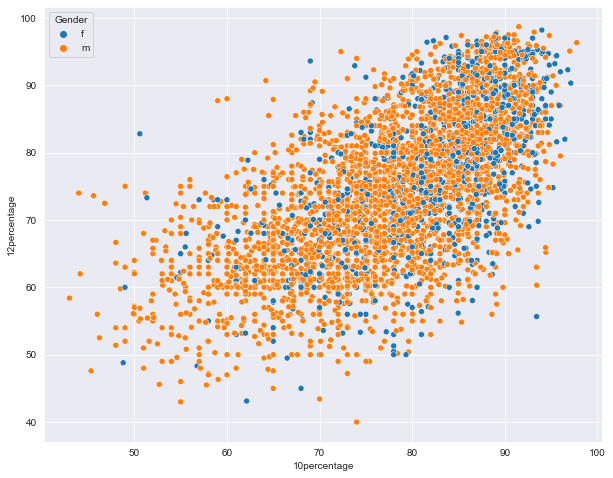

In [174]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.scatterplot(data=df, x="10percentage", y="12percentage",hue="Gender")

## Correlation between the features using boxplot

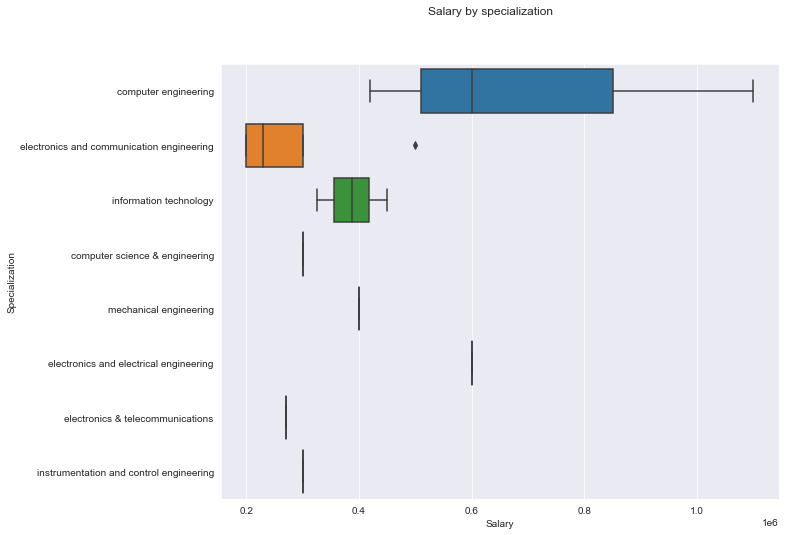

In [175]:
# Salary by Specialization
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
sns.boxplot(x=df['Salary'].iloc[:15], y = df['Specialization'].iloc[:15])
plt.suptitle('Salary by specialization')
plt.show()

## Research Questions:

* Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data.

## Hypothesis Testing

In [176]:
df.head()

,Unnamed: 0,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,2007,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,2007,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,2010,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,2007,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,2008,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [177]:
# Normalize Salary for Better Visualization
df['n_sal']=df['Salary']/100000

In [178]:
df[['Designation','Specialization']][df['Designation']=='hardware engineer']

,Designation,Specialization
197,hardware engineer,electrical engineering
802,hardware engineer,electronics and communication engineering
839,hardware engineer,electronics and communication engineering
1886,hardware engineer,electronics and communication engineering
2070,hardware engineer,electronics and communication engineering
2533,hardware engineer,electronics and communication engineering
3438,hardware engineer,electronics engineering
3547,hardware engineer,electronics and communication engineering


In [179]:
print('Average Salary :')
print('Programmer Analyst :',round(df['n_sal'][(df['GraduationYear']==2014) & (df['Designation']=='programmer analyst') & (df['Specialization']=='computer science & engineering')].mean(), 2))
print('Software Engineer :',round(df['n_sal'][(df['GraduationYear']==2014) & (df['Designation']=='software engineer')  & (df['Specialization']=='computer science & engineering')].mean(),2))
print('Hardware Engineer :',round(df['n_sal'][(df['GraduationYear']==2014) &(df['Designation']=='hardware engineer')  & (df['Specialization']=='computer science & engineering')].mean(), 2))
print('Associate Engineer :',round(df['n_sal'][(df['GraduationYear']==2014) &(df['Designation']=='associate engineer')  & (df['Specialization']=='computer science & engineering')].mean(), 2))

Average Salary :
Programmer Analyst : 3.02
Software Engineer : 3.4
Hardware Engineer : nan
Associate Engineer : 3.33


In [180]:
# Sample Data for Required Employees
sample = [3.16,3.6,0,3.5]
sample = np.array(sample)

In [181]:
# Necessary variables initialization ex- sample mean
sample_size = len(sample)
sample_mean = np.mean(sample)
sample_mean

2.565

In [182]:
# Sample Standard Devation
import math
sample_std = math.sqrt(sum([(i-sample_mean)**2 for i in sample]) / 3)
print('Sample Standard Deviation :', sample_std)

Sample Standard Deviation : 1.7203391138571102


In [183]:
# Calulating T-Score
def t_score(pop_mean, sample_mean, sample_std, sample_size):
    numerator = sample_mean - pop_mean
    denomenator = sample_std / (sample_size**0.5)
    return numerator / denomenator

In [184]:
# Necessary variables initialization ex- sample mean,population mean
pop_mean = 2.75
sample_mean = 3.34
sample_std = 0.21
sample_size = 4

In [185]:
# Calling T-score Function
t_sc = t_score(pop_mean, sample_mean, sample_std, sample_size)
print('t-score :', t_sc)

t-score : 5.619047619047618


In [186]:
# Setting the Confidence Level

# Two Tail - Deciding the Significance Level & Calculating the t-critical value
from scipy.stats import t
confidence_level = 0.95
alpha = 1 - confidence_level
t_critical = t.ppf(1-alpha/2, df = 3)
print('t_critical :', t_critical)

t_critical : 3.182446305284263


t_critical_left : 2.4158431379451524
t_critical_right : 3.0841568620548476


Text(3.34, 0.1, 'x_bar')

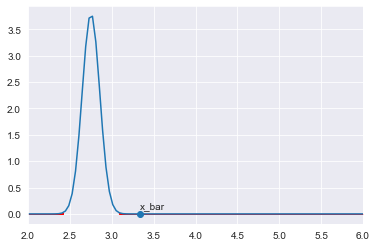

In [187]:
# Visualizing the Sampling Distribution with Rejection Regions
from scipy.stats import norm
# Defining the x min & x max
x_min = 2
x_max =6

# Defining the Sampling Distribution mean & std
mean = pop_mean
std = sample_std / (sample_size**0.5)

# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)

# Computing the left and right critical values of Two tailed Test
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)

print('t_critical_left :', t_critical_left)
print('t_critical_right :', t_critical_right)

# Shading the left rejection region
x_left = np.linspace(x_min, t_critical_left, 100)
y_left = norm.pdf(x_left, mean, std)
plt.fill_between(x_left, y_left, color='red')

# Shading the right rejection region
x_right = np.linspace(t_critical_right, x_max, 100)
y_right = norm.pdf(x_right, mean, std)
plt.fill_between(x_right, y_right, color='red')

plt.scatter(sample_mean, 0)
plt.annotate("x_bar", (sample_mean, 0.1))

In [188]:
# Compairing the Table Value and T-score value

# Conclusion using t-test

if np.abs(t_sc) > t_critical:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


In [189]:
# Conclusion using p-test
p_value = 2 * (1.0 - norm.cdf(np.abs(t_sc)))

print("p_value = ", p_value)

if p_value < alpha:
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  1.9201293444126577e-08
Reject Null Hypothesis


## Feature Transformation

## Column Standardization for Numerical Features

In [190]:
# Column standardization using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [191]:
# Standardizing Salary Column
scaled_sal = scaler.fit_transform(data['Salary'].values.reshape(-1,1))

# First 20 Scaled Values (Salary column)
print(scaled_sal[:20])

[[0.09709962]
 [0.11727617]
 [0.07313997]
 [0.26860025]
 [0.04161412]
 [0.0668348 ]
 [0.0668348 ]
 [0.09205549]
 [0.14249685]
 [0.04918033]
 [0.14249685]
 [0.10466583]
 [0.0592686 ]
 [0.04161412]
 [0.0668348 ]
 [0.07944515]
 [0.07313997]
 [0.05422446]
 [0.02143758]
 [0.07313997]]


In [192]:
# Standardizing 10th percent Column
scaled_10 = scaler.fit_transform(data['10percentage'].values.reshape(-1,1))

# First 20 Scaled Values (Salary column)
print(scaled_10[:20])

[[0.75420015]
 [0.7742878 ]
 [0.7669832 ]
 [0.7779401 ]
 [0.63915267]
 [0.8568298 ]
 [0.78670562]
 [0.89481373]
 [0.85829072]
 [0.62089116]
 [0.83272462]
 [0.69393718]
 [0.74141709]
 [0.32505478]
 [0.69758948]
 [0.48466034]
 [0.7815924 ]
 [0.32505478]
 [0.4017531 ]
 [0.65741417]]


In [193]:
# Standardizing 12th percent Column
scaled_12 = scaler.fit_transform(data['12percentage'].values.reshape(-1,1))

# First 20 Scaled Values (Salary column)
print(scaled_12[:20])

[[0.95059625]
 [0.76660988]
 [0.48040886]
 [0.7427598 ]
 [0.62691652]
 [0.80068143]
 [0.46848382]
 [0.86882453]
 [0.87223169]
 [0.54855196]
 [0.74446337]
 [0.78364566]
 [0.50817717]
 [0.38160136]
 [0.67972743]
 [0.41618399]
 [0.59284497]
 [0.45417376]
 [0.42248722]
 [0.37819421]]


## Column Standardization for Categorical Features

In [194]:
# One-hot Encoding of Gender column
dummies = pd.get_dummies(df[['Gender']])
dummies

,Gender_f,Gender_m
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
3993,0,1
3994,1,0
3995,0,1
3996,1,0


In [195]:
df1 = pd.concat([df,dummies],axis='columns')
df1.head()

,Unnamed: 0,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,12graduation,...,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,n_sal,Gender_f,Gender_m
0,train,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,2007,...,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,4.20,1,0
1,train,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,2007,...,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,5.00,0,1
2,train,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,2010,...,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,3.25,1,0
3,train,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,2007,...,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,11.00,0,1
4,train,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,2008,...,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,2.00,0,1


In [196]:
finaldf = df1.drop(['Gender','Gender_f'],axis='columns')
finaldf

,Unnamed: 0,Salary,DOJ,DOL,Designation,JobCity,DOB,10percentage,12graduation,12percentage,...,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,n_sal,Gender_m
0,train,420000,2012-06-01,present,senior quality engineer,Bangalore,1990-02-19,84.30,2007,95.80,...,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455,4.20,0
1,train,500000,2013-09-01,present,assistant manager,Indore,1989-10-04,85.40,2007,85.00,...,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637,5.00,1
2,train,325000,2014-06-01,present,systems engineer,Chennai,1992-08-03,85.00,2010,68.20,...,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721,3.25,0
3,train,1100000,2011-07-01,present,senior software engineer,Gurgaon,1989-12-05,85.60,2007,83.60,...,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194,11.00,1
4,train,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,1991-02-27,78.00,2008,76.80,...,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,2.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,train,280000,2011-10-01,2012-10-01 00:00:00,software engineer,New Delhi,1987-04-15,52.09,2006,55.50,...,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194,2.80,1
3994,train,100000,2013-07-01,2013-07-01 00:00:00,technical writer,Hyderabad,1992-08-27,90.00,2009,93.00,...,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943,1.00,0
3995,train,320000,2013-07-01,present,associate software engineer,Bangalore,1991-07-03,81.86,2008,65.50,...,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615,3.20,1
3996,train,200000,2014-07-01,2015-01-01 00:00:00,software developer,Asifabadbanglore,1992-03-20,78.72,2010,69.88,...,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943,2.00,0
